In [9]:
import sys
sys.path.append('../..')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.NeuralNetwork.autoencoder import Autoencoder, Autoencoder_identity

## Test AE on Van Der Pol

In [12]:
file_path = 'dataset/FN_train/FN_train_0.npy.npz'
data = np.load(file_path)['test_data']
print((np.shape(data)))
# data = data.reshape((1,200,251,2))
# print(np.shape(data))

(100, 1001, 20, 20, 2)


In [4]:

ae = Autoencoder_identity()
ae.get_data(file_path,compressed_name='data')


  0%|          | 0/200 [00:00<?, ?it/s]

In [5]:
# input_shape=(251,2),
ae.build_model(summary=True)

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1, 2)]         0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ae.train_model()

In [6]:
ae.save_model(name='VDP_ae_identity')

In [7]:
sample = 0
test = np.load('dataset/VDP_testset/VDP_testset_0.npz')['data'][sample]
test.shape
test = test.reshape((251,1,1,2))
test.shape


(251, 1, 1, 2)

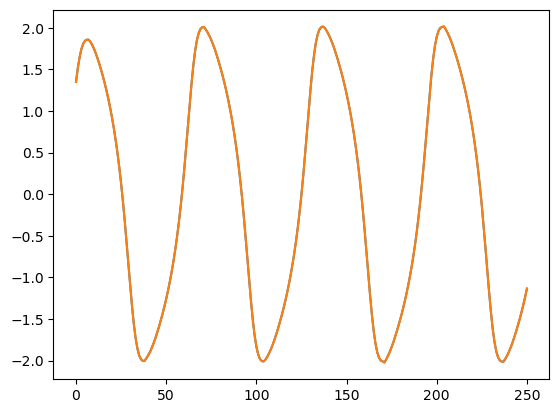

In [8]:
encoded = ae.encode(test)
encoded.shape

decoded = ae.decode(encoded)
decoded.shape

plt.plot(np.arange(0,np.shape(test)[0],1),test[:,0,0,0])
plt.plot(np.arange(0,np.shape(test)[0],1),decoded[:,0,0,0])

## Test AE on Fitzhug-Nagumo

In [ ]:
a = Autoencoder(epochs=10)
a.get_data('dataset/test_set.npz', compressed_name='test_data')
a.build_model(summary=True)


In [ ]:
a.train_model()

In [14]:
test = np.load('dataset/test_set.npz')['test_data'][0]
test.shape

(1001, 20, 20, 2)

In [5]:
encoded = a.encode(test)
encoded.shape

(1001, 10)

In [6]:
decoded = a.decode(encoded)
decoded.shape

(1001, 20, 20, 2)

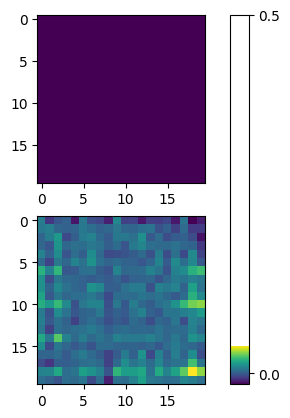

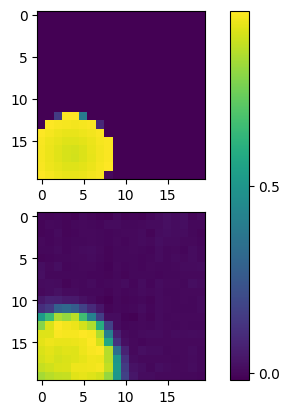

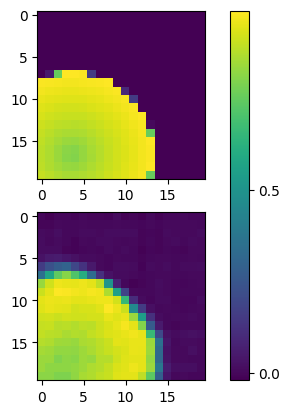

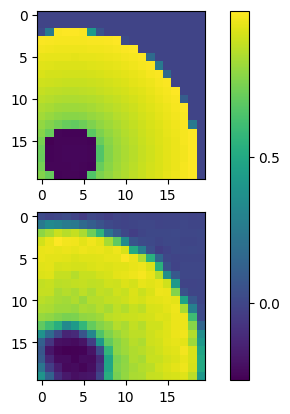

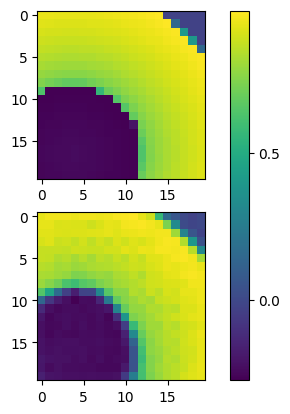

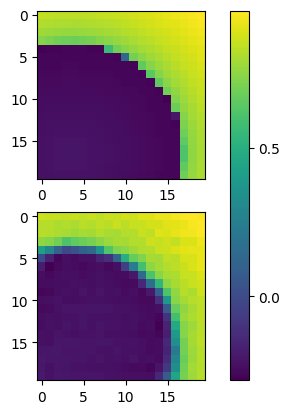

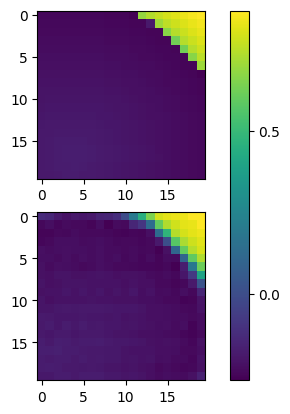

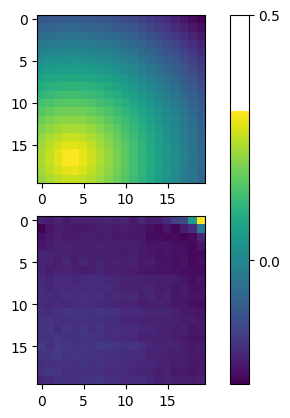

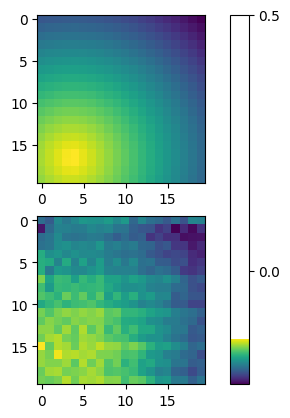

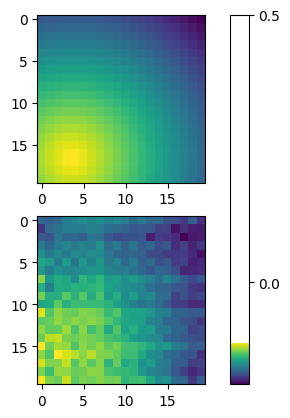

In [18]:
for i in [100*i for i in range(10)]:
    fig, ax = plt.subplots(2,1)
    ax[0].imshow(test[i,:,:,0])
    im = ax[1].imshow(decoded[i,:,:,0])
    cbar = fig.colorbar(im,ax=ax.ravel().tolist())
    cbar.set_ticks(np.arange(0,1,0.5))
    plt.show()